Anomalous Diffusion spectral fits

In [134]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from sklearn.metrics import r2_score


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *

from statistics import mean

pl.rcParams["font.family"] = "Times New Roman"


def func(x,m,b):
    return m*x + b


def biexp_func(b, frac_fast,frac_slow,diff_fast,diff_slow):
    Data = frac_slow*np.exp(-b*diff_slow)+frac_fast*np.exp(-b*diff_fast)
    normal = frac_slow+frac_fast
    return Data/normal

def monoexp_func(b, frac, diff):
    Data = frac*np.exp(-b*diff)
    return Data

In [135]:
def CalculatePE_fraction(df, trait):
    df[trait + ' PE'] = (df['Fit ' + trait]-df['true ' + trait])#*100/(df['true ' + trait])
    return df

def CalculatePE_diffusion(df, trait): #scale by 1000
    df[trait + ' PE'] = ((df['Fit ' +trait]/1000)-df['true ' + trait])#*100/(df['true ' + trait])
    return df

In [136]:
b = [0,10,30,50,80,120,200,400,800]

# Gaussian, no noise

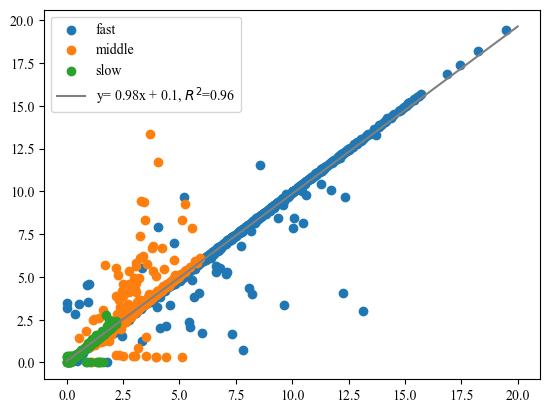

SignificanceResult(statistic=0.9786137140989393, pvalue=0.0)
All fD difference = 0.00154 ± 0.61554, -0.06411%
fast fD difference = -0.10635 ± 0.73648, -0.64333%
med fD difference = 0.08697 ± 0.74602, 0.26410%
slow fD difference = 0.02401 ± 0.13513, 1.76009%


In [137]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='fast')
pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitslowfDs,label='slow')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# okay... now with noise?? 

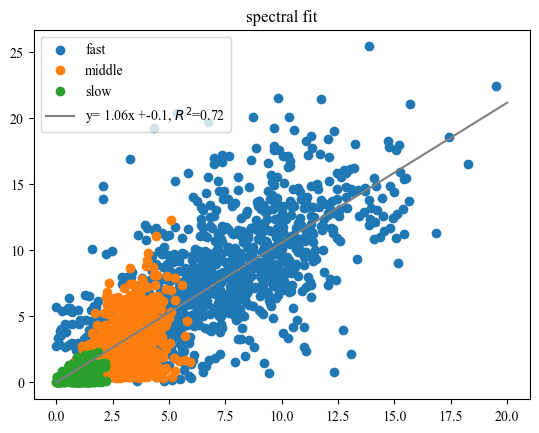

SignificanceResult(statistic=0.8443386752660812, pvalue=0.0)
All fD difference = 0.16692 ± 2.17193, -4.86246%
fast fD difference = 0.91619 ± 3.24570, 10.82095%
med fD difference = -0.00068 ± 1.55034, 0.32980%
slow fD difference = -0.41475 ± 0.53464, -35.58901%
relative percent difference
SignificanceResult(statistic=0.9429157342375625, pvalue=0.0)
fast fD  10.26544%
med fD 0.32922%
slow fD -43.29274%
0.9975776815917962 0.010088631990697393
2.951 0.21586801523152888


In [138]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AN_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='fast')
pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitslowfDs,label='slow')

AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit')
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')


print('relative percent difference')
print(scipy.stats.spearmanr(AllTrue,AllFit))
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print(np.mean(TrueDataFits['Fit rsq']), np.std(TrueDataFits['Fit rsq']))
print(np.mean(TrueDataFits['Fit number of peaks']), np.std(TrueDataFits['Fit number of peaks']))

# now tri-exp fit of gaussian averaged with noise (SNR=50)

goodness of fit: r2=0.99701±0.00261


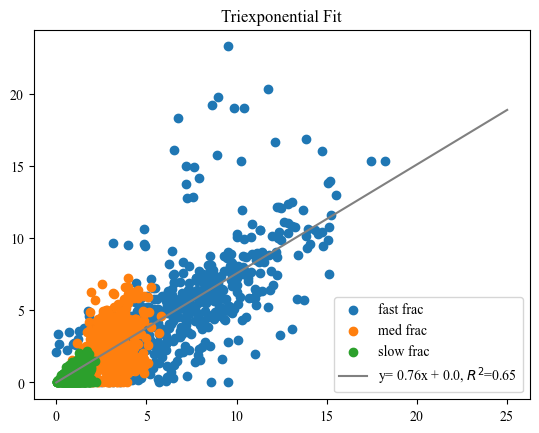

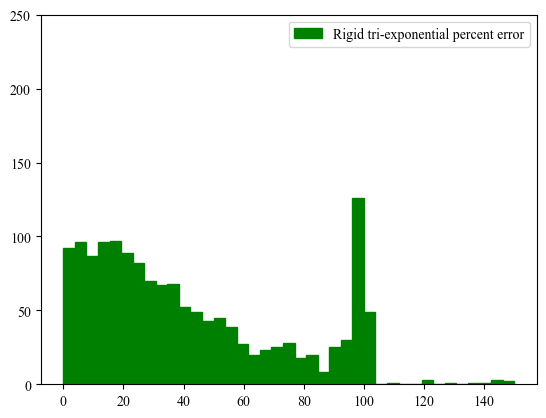

79.54133557114187
SignificanceResult(statistic=0.7062719224304782, pvalue=7.074873417196867e-152)
All fD difference = -71.57738 ± 109.78471, -63.86198%
fast fD difference = -1.60506 ± 2.93700, -23.62830%
med fD difference = -0.39013 ± 1.46663, -8.75752%
slow fD difference = -0.38535 ± 0.53902, -30.89952%
3.0 0.0
relative percent difference
fast fD  -26.79390%
med fD -9.15891%
slow fD -36.54581%


In [160]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

TrueFracs = []
TrueDiffs = []
FitFracs = []
FitDiffs = []
r2_fit=[]
compartment_number = []
for j in range(500):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.5,.1,.1]),maxfev=10000)
    #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    
    ## order popt from fast to slow diffusion
    norm_popt = popt[0]+popt[1]+popt[2]
    idx_sort = popt[3:6].argsort()
    fracs = popt[0:3]/norm_popt
    diffusions = popt[3:6]
    fracs=fracs[idx_sort[::-1]]
    diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    
    comp_num = 3-np.count_nonzero(FitFracs==0) #how many compartments with fraction=0
    compartment_number.append(comp_num)
    y_pred = triexp_func(b_values11, *popt)
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 

TruefastfDs= 1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0]
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1]
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2]
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


pl.scatter(1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0], 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
pl.scatter(1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
pl.scatter(1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')

x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit')
pl.show()
#print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
#print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
#print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs-TruefastfDs))/TruefastfDs):.5f}%')
#print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs-TruemedfDs))/TruemedfDs):.5f}%')
#print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs-TrueslowfDs))/TrueslowfDs):.5f}%')

pl.hist(100*np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)),bins = np.linspace(0,150,40), facecolor='green',edgecolor='green', label = 'Rigid tri-exponential percent error')
pl.ylim(0,250)
pl.legend()
pl.show()
print(100*np.mean(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))



print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')

print(np.mean(compartment_number), np.std(compartment_number))

print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


# now bi-exponential of the averaged gaussian with noise 

goodness of fit: r2=0.99338±0.00571


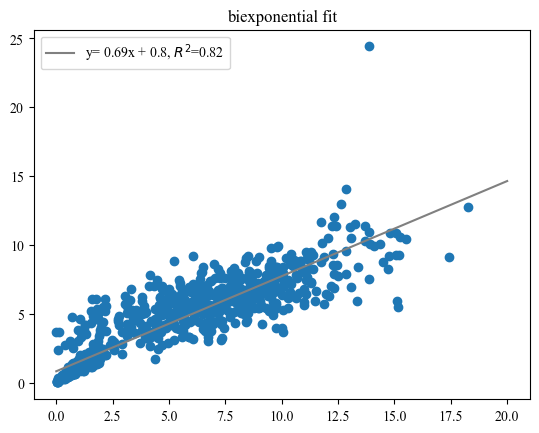

SignificanceResult(statistic=0.942913950913951, pvalue=0.0)
All fD difference = -0.42414 ± 1.76859, 6.67228%
fast fD mean difference = -1.00390± 2.35479, -13.85377%
slow fD mean difference = 0.15562± 0.19623, 18.32538%
relative percent difference
fast fD  -14.88499%
med fD -200.00000%
slow fD 16.78722%


In [140]:
# trying bi-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
FitFracs = []
FitDiffs = []
r2_fit = []
for j in range(500):
    #popt, pcov = curve_fit(biexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.7, 0.1, 0.001],bounds=(0, [1,1,.1,.1]),maxfev=10000)
    
    ## order popt from fast to slow diffusion
    #norm_popt = popt[0]+popt[1]
    #idx_sort = popt[2:4].argsort()
    #fracs = popt[0:2]/norm_popt
    #diffusions = popt[2:4]
    #fracs=fracs[idx_sort[::-1]]
    #diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    
    ## two step fit
    
    # fit slow
    popt1, pcov = curve_fit(monoexp_func, b_values11[6:],df_AveragedNoise.iloc[j,8:],p0=[.7, 0.001],bounds=(0, [1,.1]),maxfev=10000)

    #pl.plot(b_values11, monoexp_func(b_values11, popt1[0], popt1[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    # subtract slow fit
    popt2, pcov = curve_fit(monoexp_func, b_values11,df_AveragedNoise.iloc[j,2:]-monoexp_func(b_values11,popt1[0], popt1[1]),p0=[.1, 0.01],bounds=(0, [1,.2]),maxfev=10000)

    
    ## order popt from fast to slow diffusion
    norm_popt = popt1[0]+popt2[0]
    diffusions = [popt2[1], popt1[1]]
    fracs=[popt2[0], popt1[0]]/norm_popt
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    #pl.plot(b_values11, biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    
    ## order given true values from fast to slow just in case
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    
    y_pred = biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1])
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 
TruefastfDs= (1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0]) #+ 1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1])
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1]
#FitmedfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2]
FitslowfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

AllTrue = np.append(TruefastfDs,TrueslowfDs)
AllFit = np.append(FitfastfDs,FitslowfDs)

pl.scatter(AllTrue,AllFit)
x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTrue, AllFit)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit')
pl.show()


print(scipy.stats.spearmanr(AllTrue, AllFit))
print(f'All fD difference = {np.mean(AllFit - AllTrue):.5f} ± {np.std(AllFit - AllTrue):.5f}, {100*np.median((AllFit - AllTrue)/AllTrue):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median((FitfastfDs-TruefastfDs)/TruefastfDs):.5f}%')
#print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median((FitmedfDs-TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median((FitslowfDs-TrueslowfDs)/TrueslowfDs):.5f}%')



print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((0-TruemedfDs)/(TruemedfDs + 0)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


# okay.... now anomalous without noise

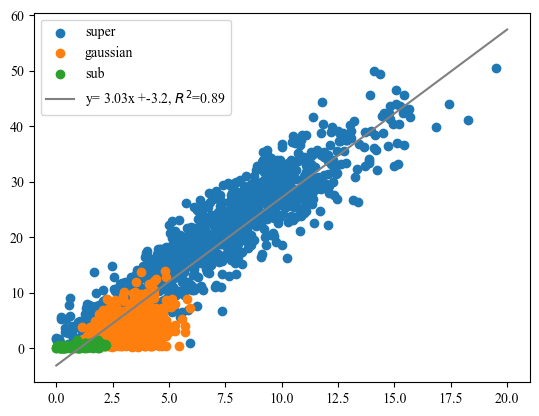

SignificanceResult(statistic=0.9055457295967213, pvalue=0.0)
All fD difference = 4.32601 ± 7.52521, 8.36661%
fast fD difference = 13.19618 ± 6.91240, 191.52784%
med fD difference = 0.31522 ± 1.89114, 0.80674%
slow fD difference = -0.53337 ± 0.38543, -59.77541%


In [141]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# now attempting to correct it based on anomalous diffusion

(see scale) difference

Adjust the 'true' to be using the fA and DA, while the 'fit' is the assumed multi-exponential

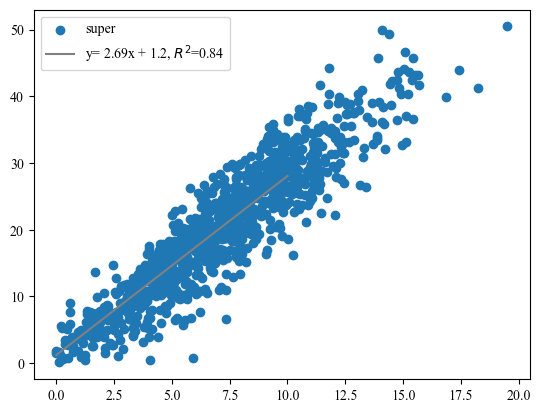

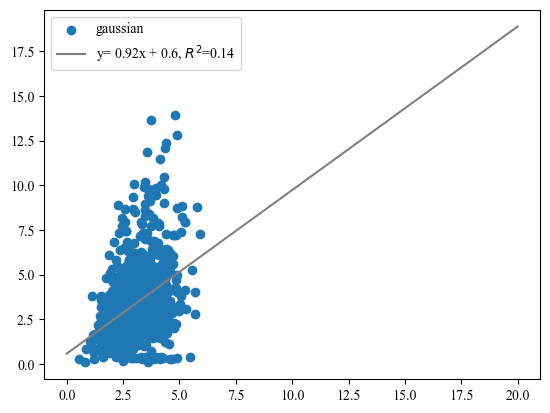

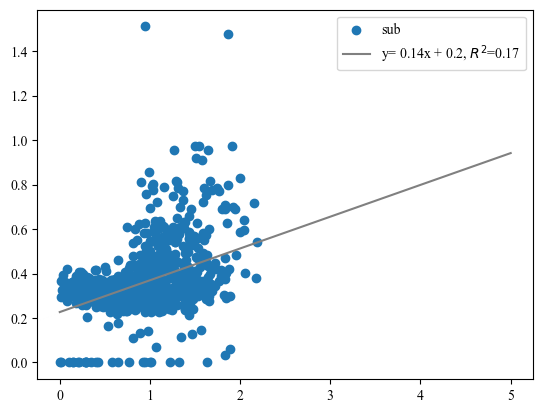

In [142]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,10,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,5,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


# trying correlation against other mathematical models.... 

like fADA^1/gamma vs fD

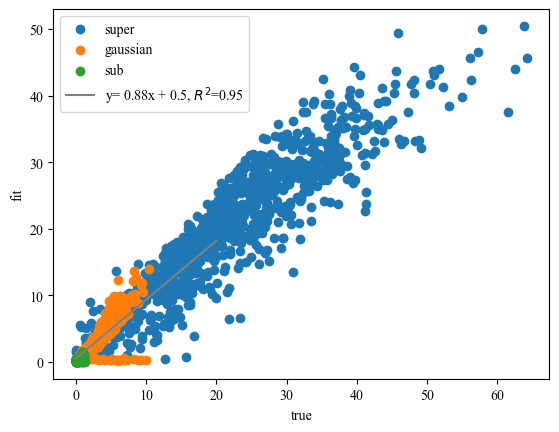

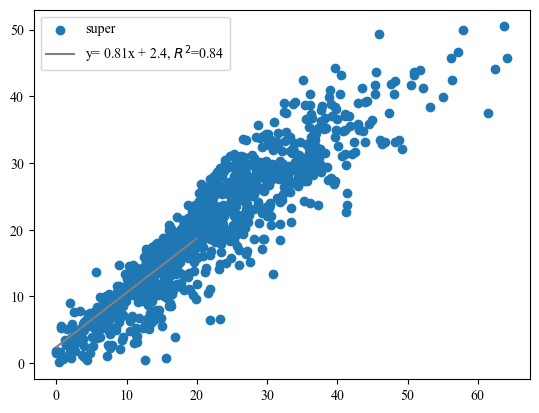

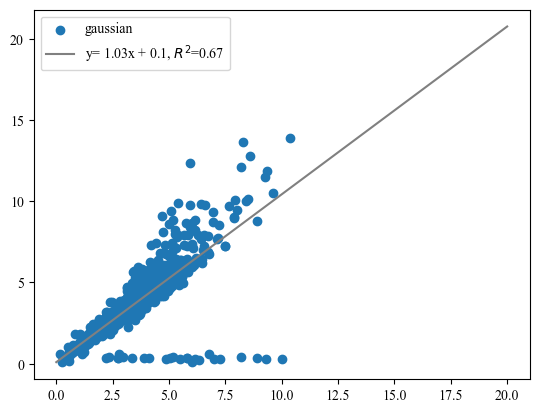

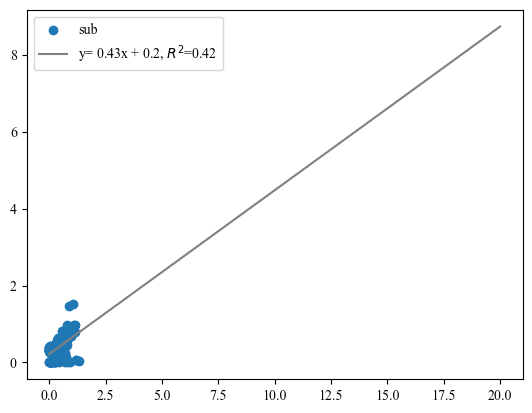

In [143]:

TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']




pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


# now anomalous with noise

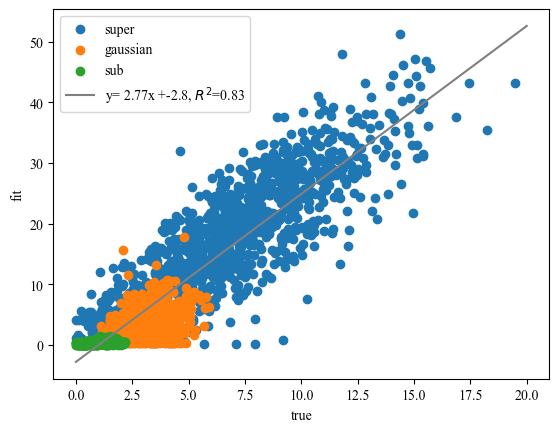

SignificanceResult(statistic=0.8752392979174777, pvalue=0.0)
All fD difference = 3.70125 ± 7.08362, 1.46775%
fast fD difference = 11.54161 ± 7.36141, 167.65759%
med fD difference = 0.11979 ± 1.93173, -4.05033%
slow fD difference = -0.55765 ± 0.41777, -61.66570%
relative percent difference
fast fD  91.20312%
med fD -4.13406%
slow fD -89.15473%


In [144]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AN_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('true')
pl.ylabel('fit')
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')


print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


# now anomalous with noise against the fADA^1/gamma

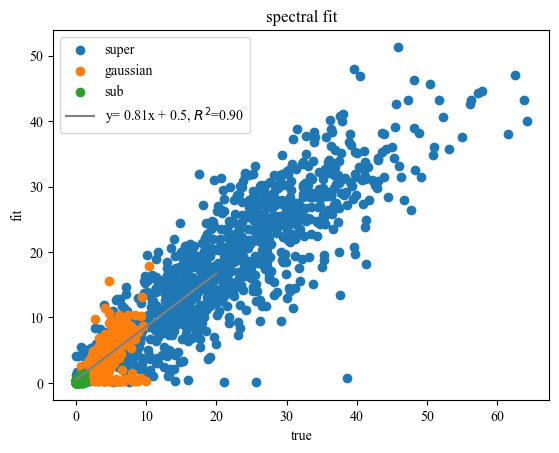

SignificanceResult(statistic=0.9208196926582732, pvalue=0.0)
All fD difference = -1.09713 ± 3.85699, -1.14372%
fast fD difference = -3.31655 ± 5.89580, -13.90163%
med fD difference = 0.00634 ± 1.55826, 3.12362%
slow fD difference = 0.01883 ± 0.22748, 16.41890%
relative percent difference
fast fD  -14.94008%
med fD 3.07559%
slow fD 15.17326%


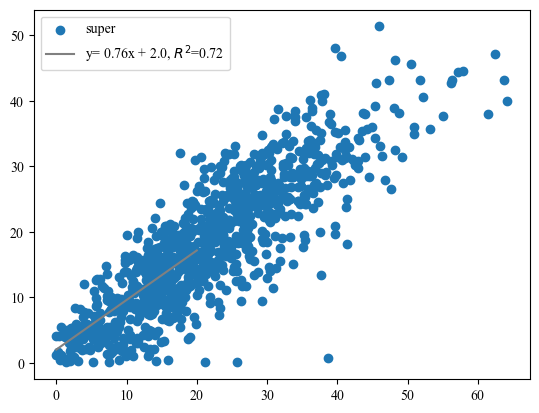

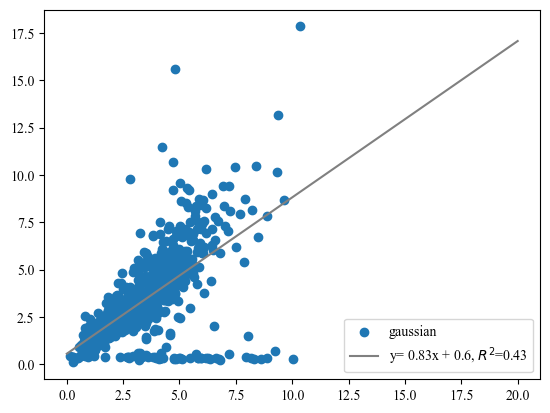

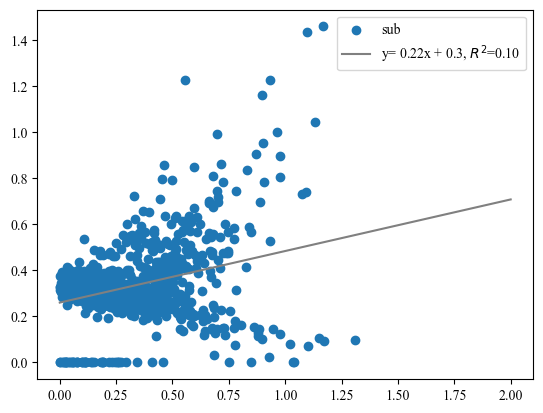

0.990671235852996 0.018563458703152857
2.954 0.2094850830011535
now just f and D independently


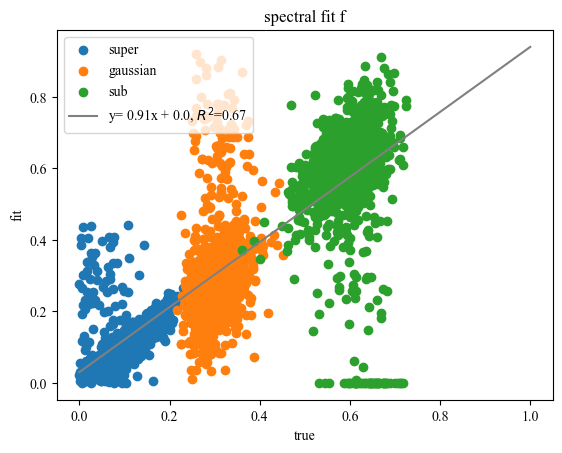

relative percent difference
fast f  4.67201%
med f -6.14374%
slow f 2.94325%


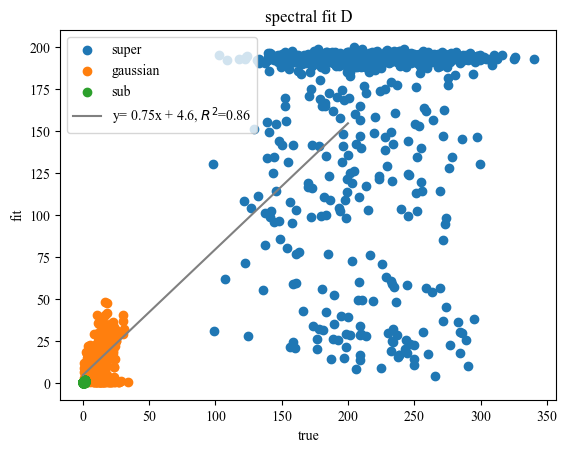

relative percent difference
fast D  -16.51105%
med D 10.31795%
slow D 11.41801%


In [145]:

TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')


print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')







pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


print(np.mean(TrueDataFits['Fit rsq']), np.std(TrueDataFits['Fit rsq']))
print(np.mean(TrueDataFits['Fit number of peaks']), np.std(TrueDataFits['Fit number of peaks']))





print('now just f and D independently')


TruefastfDs = df_AveragedData['true fast fraction']#*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = df_AveragedData['true med fraction']#*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = df_AveragedData['true slow fraction']#*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']#*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']#*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']#*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit f')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast f  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')






TruefastfDs = 1000*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,200,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit D')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



# now tri-exp of anomalous with noise

goodness of fit: r2=0.99469±0.00405


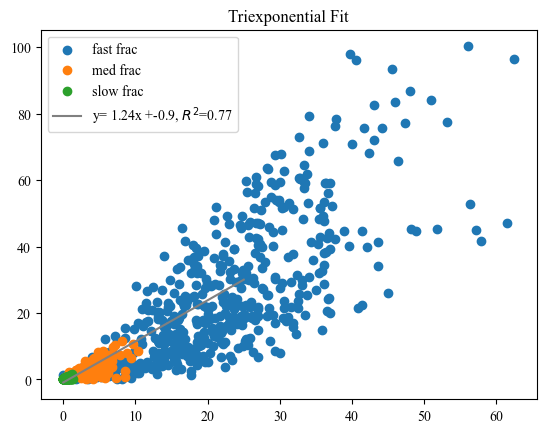

SignificanceResult(statistic=0.9065219353430825, pvalue=0.0)
All fD difference = 0.00596 ± 0.01383, 68.97219%
fast fD mean difference = 3.59688± 14.19260, 45.43488%
med fD mean difference = -0.16745± 1.20828, 15.29905%
slow fD mean difference = -0.06604± 0.20816, 35.66144%
relative percent difference
fast fD  -2.42640%
med fD 2.29466%
slow fD -12.99447%
mean relative percent difference
fast fD  -7.48139%
med fD -5.95180%
slow fD -33.52595%
3.0 0.0


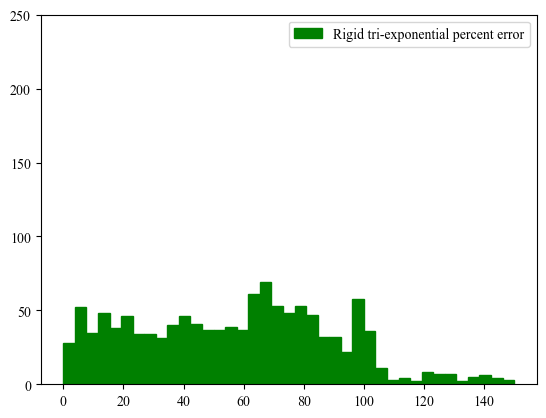

138.03181045159667
now just f and D independently


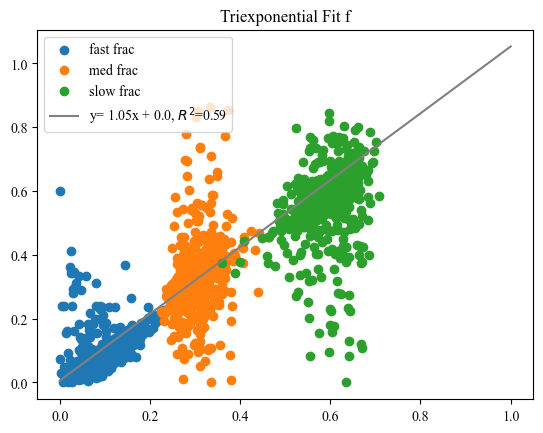

relative percent difference
fast D  -12.98136%
med D 7.01572%
slow D -1.43577%


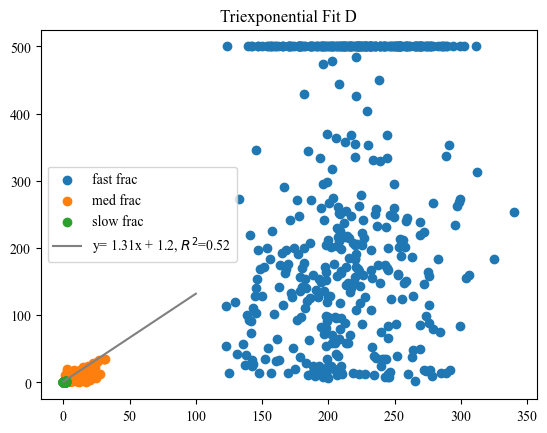

relative percent difference
fast D  13.45522%
med D -6.86346%
slow D -11.84527%


In [156]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit=[]
compartment_number=[]
for j in range(500):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.5,.1,.1]),maxfev=10000)
    #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    
    ## order popt from fast to slow diffusion
    norm_popt = popt[0]+popt[1]+popt[2]
    idx_sort = popt[3:6].argsort()
    fracs = popt[0:3]/norm_popt
    diffusions = popt[3:6]
    fracs=fracs[idx_sort[::-1]]
    diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))

    comp_num = 3-np.count_nonzero(FitFracs==0) #how many compartments with fraction=0
    compartment_number.append(comp_num)
    y_pred = triexp_func(b_values11, *popt)
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 

TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


#pl.scatter(1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0], 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
#pl.scatter(1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
#pl.scatter(1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit')
pl.show()
print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs-TruefastfDs))/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs-TruemedfDs))/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs-TrueslowfDs))/TrueslowfDs):.5f}%')



print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')
print('mean relative percent difference')
print(f'fast fD  {200*np.mean((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.mean((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.mean((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print(np.mean(compartment_number), np.std(compartment_number))

pl.hist(100*np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)),bins = np.linspace(0,150,40), facecolor='green',edgecolor='green', label = 'Rigid tri-exponential percent error')
pl.ylim(0,250)
pl.legend()
pl.show()
print(100*np.mean(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))





print('now just f and D independently')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs=np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = np.array(FitFracs)[:,2]#*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit f')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')





TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) 
FitslowfDs = 1000*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit D')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




# now bi-exponential with anomalous noise

goodness of fit: r2=0.97707±0.01887


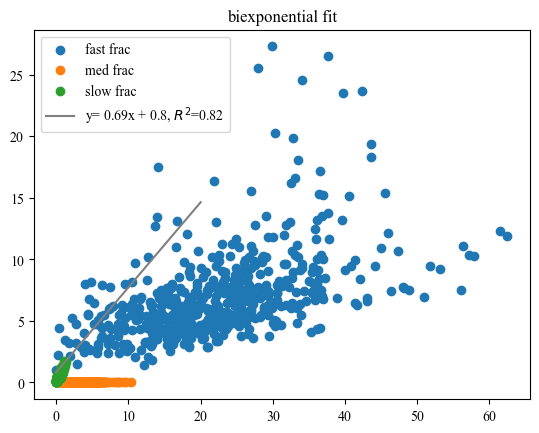

SignificanceResult(statistic=0.942913950913951, pvalue=0.0)
All fD difference = -47.71590 ± 198.96590, 4.40062%
fast fD mean difference = -15.16358± 9.61341, -69.29177%
slow fD mean difference = 0.13673± 0.13262, 48.42406%
relative percent difference
fast fD  -106.02510%
med fD -200.00000%
slow fD 38.98499%
individual f and D


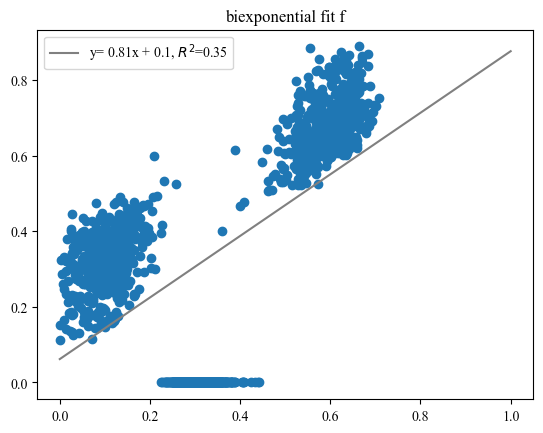

relative percent difference
fast fD  103.61671%
med fD -200.00000%
slow fD 11.37695%


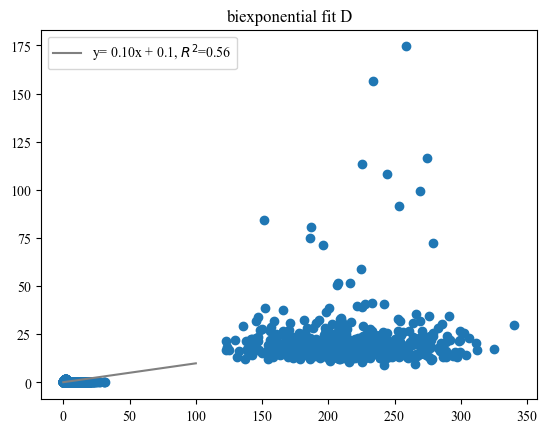

relative percent difference
fast fD  -167.77697%
med fD -200.00000%
slow fD 22.51382%
fast fD  167.77697%
med fD 200.00000%
slow fD 24.12951%


In [153]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

# trying bi-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit = []
compartment_number=[]
for j in range(500):
    #popt, pcov = curve_fit(biexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.7, 0.1, 0.001],bounds=(0, [1,1,.1,.1]),maxfev=10000)
    
    ## order popt from fast to slow diffusion
    #norm_popt = popt[0]+popt[1]
    #idx_sort = popt[2:4].argsort()
    #fracs = popt[0:2]/norm_popt
    #diffusions = popt[2:4]
    #fracs=fracs[idx_sort[::-1]]
    #diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    
    ## two step fit
    
    # fit slow
    popt1, pcov = curve_fit(monoexp_func, b_values11[6:],df_AveragedNoise.iloc[j,8:],p0=[.7, 0.001],bounds=(0, [1,.1]),maxfev=10000)

    #pl.plot(b_values11, monoexp_func(b_values11, popt1[0], popt1[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    # subtract slow fit
    popt2, pcov = curve_fit(monoexp_func, b_values11,df_AveragedNoise.iloc[j,2:]-monoexp_func(b_values11,popt1[0], popt1[1]),p0=[.1, 0.01],bounds=(0, [1,.2]),maxfev=10000)

    
    ## order popt from fast to slow diffusion
    norm_popt = popt1[0]+popt2[0]
    diffusions = [popt2[1], popt1[1]]
    fracs=[popt2[0], popt1[0]]/norm_popt
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    #pl.plot(b_values11, biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))
  
    
    y_pred = biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1])
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    if r2_goodness>0:
        r2_fit.append(r2_goodness)
    else:
        r2_fit.append(0)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,20,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTrue,AllFit)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit')
pl.show()


print(scipy.stats.spearmanr(112.5*AllTrue, 112.5*AllFit))
print(f'All fD difference = {np.mean(112.5*AllFit - 112.5*AllTrue):.5f} ± {np.std(112.5*AllFit - 112.5*AllTrue):.5f}, {100*np.median((112.5*AllFit - 112.5*AllTrue)/112.5*AllTrue):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median((FitfastfDs-TruefastfDs)/TruefastfDs):.5f}%')
#print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median((FitmedfDs-TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median((FitslowfDs-TrueslowfDs)/TrueslowfDs):.5f}%')


print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((0-TruemedfDs)/(TruemedfDs + 0)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')






print('individual f and D')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs= 1*np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= 1*np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1*np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))



x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit f')
pl.show()
print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')





TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))



x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit D')
pl.show()
print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print(f'fast fD  {200*np.median(np.abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(np.abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(np.abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




# distribution of gammas

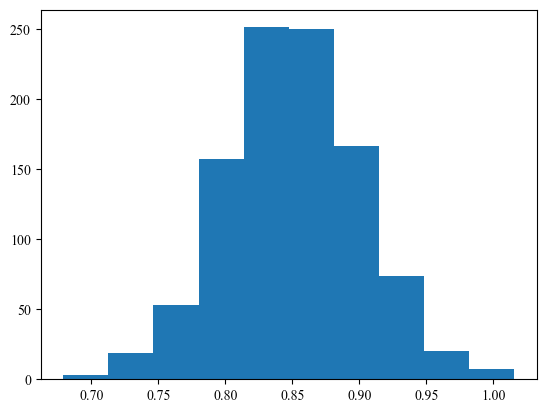

In [15]:
pl.hist(df_AveragedData['true slow gamma'])
pl.show()

(array([  5.,  28.,  77., 135., 211., 225., 181.,  93.,  29.,  16.]),
 array([0.69588144, 0.75403448, 0.81218753, 0.87034057, 0.92849362,
        0.98664666, 1.04479971, 1.10295275, 1.1611058 , 1.21925884,
        1.27741189]),
 <BarContainer object of 10 artists>)

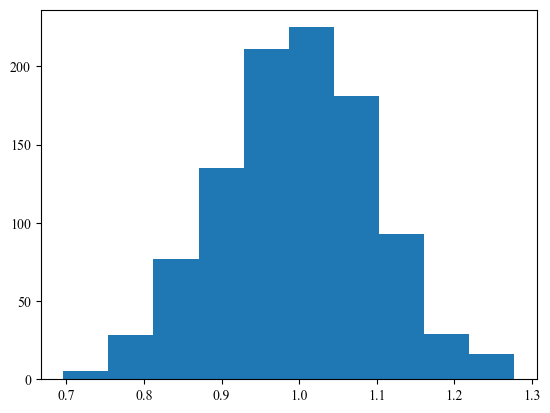

In [16]:
pl.hist(df_AveragedData['true med gamma'])

(array([  5.,  33.,  99., 188., 254., 223., 137.,  51.,   8.,   2.]),
 array([1.12401071, 1.25674281, 1.38947491, 1.52220701, 1.65493912,
        1.78767122, 1.92040332, 2.05313542, 2.18586752, 2.31859962,
        2.45133172]),
 <BarContainer object of 10 artists>)

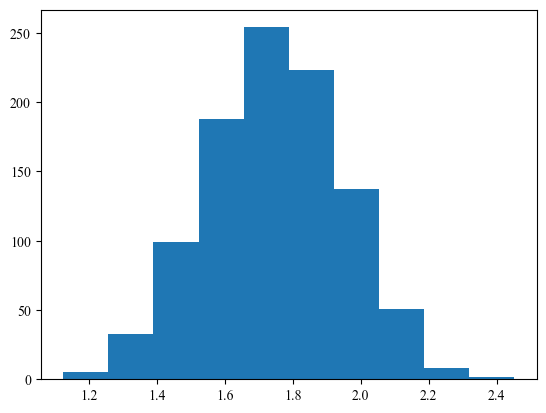

In [17]:
pl.hist(df_AveragedData['true fast gamma'])

# Trying single sub-diffusion peak Gaussian

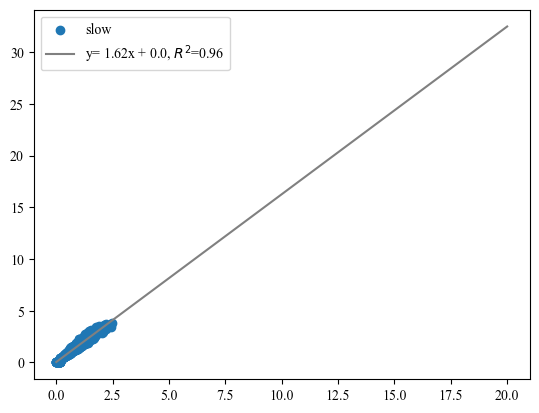

SignificanceResult(statistic=0.9814862037226125, pvalue=0.0)
All fD difference = 0.62005 ± 0.32020, 66.60136%
fast fD difference = -5.52609 ± 3.39376, -78.33931%
med fD difference = -3.01366 ± 0.83882, -100.00000%
slow fD difference = -0.92410 ± 0.45210, -100.00000%


In [26]:
fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/MultiExpSimulatedCurves_anomalous_11272024_sub.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/Simulated_1peak_AnomalousDiffusionSpectra_Fits_slow.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']


#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TrueslowfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# now fit slow diffusion peak, sub-diffusion

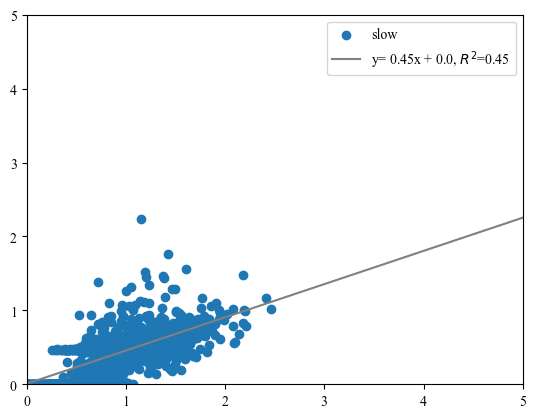

now fit to fADA^1/gamma


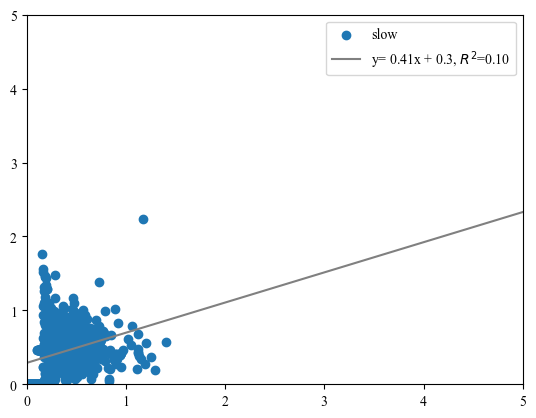

In [32]:
fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/MultiExpSimulatedCurves_anomalous_11272024_sub.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/Simulated_1peak_AnomalousDiffusionSpectra_Fits_slow.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']


#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TrueslowfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlim(0,5)
pl.ylim(0,5)
pl.show()


#print(scipy.stats.spearmanr(AllTruefD,allFitfD))
#print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
#print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
#print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
#print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')





print('now fit to fADA^1/gamma')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TrueslowfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlim(0,5)
pl.ylim(0,5)
pl.show()


# single fast diffusion, gaussian



# okay there is something off



Maybe signal decay is too fast?? 

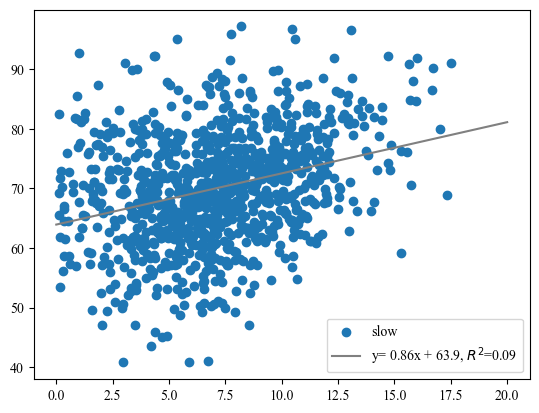

SignificanceResult(statistic=0.2946901866901867, pvalue=1.740977668820217e-21)
All fD difference = 62.92933 ± 8.88215, 883.52716%
fast fD difference = 62.92933 ± 8.88215, 883.52716%
med fD difference = -3.02406 ± 0.84462, -100.00000%
slow fD difference = -0.90968 ± 0.44164, -100.00000%


In [41]:
fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/MultiExpSimulatedCurves_anomalous_11272024_fast.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/Simulated_1peak_AnomalousDiffusionSpectra_Fits_fast.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']


#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TruefastfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TruefastfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# tri-exp with gaussian

goodness of fit: r2=0.99701±0.00261


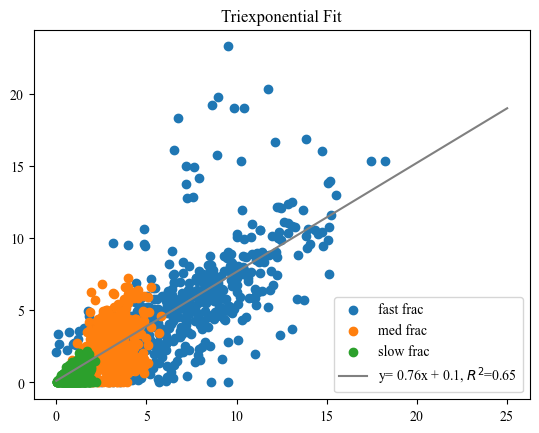

SignificanceResult(statistic=0.8078273670343853, pvalue=0.0)
All fD difference = -0.00079 ± 0.00200, 32.78045%
fast fD mean difference = -1.60506± 2.93700, 30.52895%
med fD mean difference = -0.39013± 1.46663, 32.06511%
slow fD mean difference = -0.38535± 0.53902, 37.46658%
relative percent difference
fast fD  -26.79390%
med fD -9.15891%
slow fD -36.54581%
mean relative percent difference
fast fD  -32.85036%
med fD -23.01409%
slow fD -75.44543%
3.0 0.0


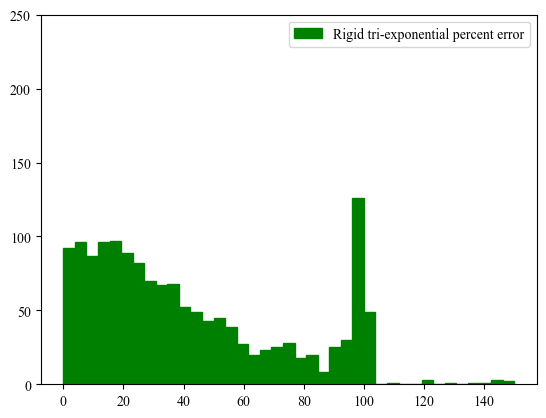

79.54133557114187
now just f and D independently


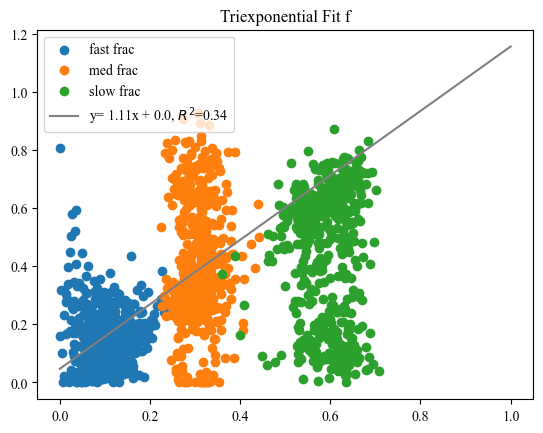

relative percent difference
fast D  8.10884%
med D 14.99624%
slow D -7.82991%


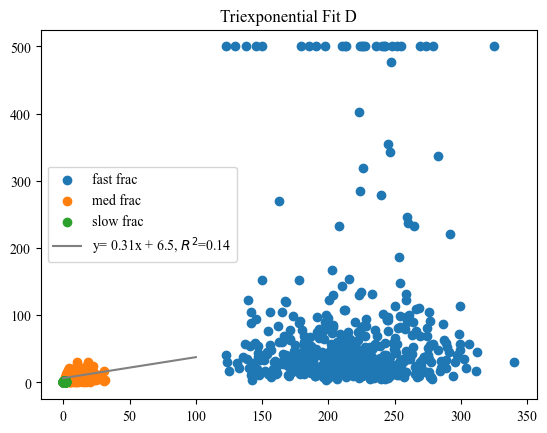

relative percent difference
fast D  -137.74975%
med D -30.49149%
slow D 64.00372%


In [159]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit=[]
compartment_number=[]
for j in range(500):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.5,.1,.1]),maxfev=10000)
    #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    
    ## order popt from fast to slow diffusion
    norm_popt = popt[0]+popt[1]+popt[2]
    idx_sort = popt[3:6].argsort()
    fracs = popt[0:3]/norm_popt
    diffusions = popt[3:6]
    fracs=fracs[idx_sort[::-1]]
    diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))

    comp_num = 3-np.count_nonzero(FitFracs==0) #how many compartments with fraction=0
    compartment_number.append(comp_num)
    y_pred = triexp_func(b_values11, *popt)
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 

TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


#pl.scatter(1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0], 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
#pl.scatter(1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
#pl.scatter(1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit')
pl.show()
print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs-TruefastfDs))/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs-TruemedfDs))/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs-TrueslowfDs))/TrueslowfDs):.5f}%')



print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')
print('mean relative percent difference')
print(f'fast fD  {200*np.mean((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.mean((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.mean((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print(np.mean(compartment_number), np.std(compartment_number))

pl.hist(100*np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)),bins = np.linspace(0,150,40), facecolor='green',edgecolor='green', label = 'Rigid tri-exponential percent error')
pl.ylim(0,250)
pl.legend()
pl.show()
print(100*np.mean(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))





print('now just f and D independently')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs=np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = np.array(FitFracs)[:,2]#*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit f')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')





TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) 
FitslowfDs = 1000*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit D')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


